In [1]:
# MODIFY! 
# use RobustScaler! 
model_name = 'RF'

# Import Libraries & Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/dl-pfe-ns.csv')
X = df.drop('throughput',axis=1)
y = df['throughput']

---

# Scale Data

In [4]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Determine Hyperparameters

In [6]:
# MODIFY!
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(warm_start=True)
model

RandomForestRegressor(warm_start=True)

In [7]:
p_grid = {
    'max_features':['auto', 'sqrt', 'log2']
}

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid =p_grid, 
    scoring='neg_mean_squared_error',
    cv=3, 
    verbose=1
)

In [10]:
grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.2s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error', verbose=1)

# Score Models

In [11]:
estimators = [5,10,25,50,100,200,1000,2000,5000]
scores_list = []

from sklearn.ensemble import RandomForestRegressor

for e in estimators: 
    print(f'Starting {e} estimators')
    score_model = RandomForestRegressor(n_estimators=e)
    
    from sklearn.model_selection import cross_validate

    scores = cross_validate(
        score_model, 
        X_train, 
        y_train,
        scoring=[
            'neg_mean_absolute_error',
            'neg_mean_squared_error',
            'neg_root_mean_squared_error'
        ],
        cv=10
    )
    
    scores = pd.DataFrame(scores)
    scores
    mean_scores = scores.mean()
    scores_list.append(mean_scores)
    print(f'Done with {e} estimators')

Starting 5 estimators
Done with 5 estimators
Starting 10 estimators
Done with 10 estimators
Starting 25 estimators
Done with 25 estimators
Starting 50 estimators
Done with 50 estimators
Starting 100 estimators
Done with 100 estimators
Starting 200 estimators
Done with 200 estimators
Starting 1000 estimators
Done with 1000 estimators
Starting 2000 estimators
Done with 2000 estimators
Starting 5000 estimators
Done with 5000 estimators


In [12]:
scores_df = pd.DataFrame(scores_list)

In [13]:
scores_df

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.138848,0.005172,-3.364167,-20.410156,-4.503044
1,0.234372,0.006328,-3.179680,-18.544610,-4.280042
2,0.563397,0.006578,-3.125820,-17.769321,-4.200942
3,2.482376,0.048875,-3.078728,-17.146302,-4.126349
4,2.843103,0.031439,-3.053816,-17.133003,-4.123428
5,3.168424,0.031987,-3.058948,-17.091996,-4.119199
6,28.228104,0.535285,-3.040036,-16.944588,-4.100663
7,35.336651,0.336339,-3.043702,-16.967762,-4.103664
8,66.626516,0.580251,-3.040829,-16.934674,-4.099363


In [14]:
scores_df['Est'] = estimators

In [15]:
scores_df

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,Est
0,0.138848,0.005172,-3.364167,-20.410156,-4.503044,5
1,0.234372,0.006328,-3.179680,-18.544610,-4.280042,10
2,0.563397,0.006578,-3.125820,-17.769321,-4.200942,25
3,2.482376,0.048875,-3.078728,-17.146302,-4.126349,50
4,2.843103,0.031439,-3.053816,-17.133003,-4.123428,100
5,3.168424,0.031987,-3.058948,-17.091996,-4.119199,200
6,28.228104,0.535285,-3.040036,-16.944588,-4.100663,1000
7,35.336651,0.336339,-3.043702,-16.967762,-4.103664,2000
8,66.626516,0.580251,-3.040829,-16.934674,-4.099363,5000


# Export Scores

In [16]:
# mean_scores

In [17]:
scores_df = scores_df.rename(columns={
    'fit_time':'Fit Time',
    'score_time':'Score Time',
    'test_neg_mean_absolute_error':'MAE',
    'test_neg_mean_squared_error':'MSE',
    'test_neg_root_mean_squared_error':'RMSE'
})

In [18]:
scores_df

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,0.138848,0.005172,-3.364167,-20.410156,-4.503044,5
1,0.234372,0.006328,-3.179680,-18.544610,-4.280042,10
2,0.563397,0.006578,-3.125820,-17.769321,-4.200942,25
3,2.482376,0.048875,-3.078728,-17.146302,-4.126349,50
4,2.843103,0.031439,-3.053816,-17.133003,-4.123428,100
5,3.168424,0.031987,-3.058948,-17.091996,-4.119199,200
6,28.228104,0.535285,-3.040036,-16.944588,-4.100663,1000
7,35.336651,0.336339,-3.043702,-16.967762,-4.103664,2000
8,66.626516,0.580251,-3.040829,-16.934674,-4.099363,5000


In [19]:
scores_df[['MAE','MSE','RMSE']] = scores_df[['MAE','MSE','RMSE']].apply(lambda x : abs(x))

In [20]:
scores_df
# we go for 25 estimations. Note that from 25 -> 50 estimations the error metrics worsen

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,0.138848,0.005172,3.364167,20.410156,4.503044,5
1,0.234372,0.006328,3.179680,18.544610,4.280042,10
2,0.563397,0.006578,3.125820,17.769321,4.200942,25
3,2.482376,0.048875,3.078728,17.146302,4.126349,50
4,2.843103,0.031439,3.053816,17.133003,4.123428,100
5,3.168424,0.031987,3.058948,17.091996,4.119199,200
6,28.228104,0.535285,3.040036,16.944588,4.100663,1000
7,35.336651,0.336339,3.043702,16.967762,4.103664,2000
8,66.626516,0.580251,3.040829,16.934674,4.099363,5000


In [21]:
scores_df.to_csv(f'./scores/{model_name}-score.csv')

In [81]:
pct_scores_df = scores_df.pct_change()

In [82]:
pct_scores_df

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.687977,0.223523,-0.054839,-0.091403,-0.049523,1.0
2,1.403862,0.039438,-0.016939,-0.041807,-0.018481,1.5
3,3.406086,6.430067,-0.015065,-0.035061,-0.017756,1.0
4,0.145315,-0.356747,-0.008092,-0.000776,-0.000708,1.0
5,0.114425,0.017443,0.001680,-0.002393,-0.001026,1.0
6,7.909194,15.734417,-0.006183,-0.008624,-0.004500,4.0
7,0.251825,-0.371664,0.001206,0.001368,0.000732,1.0
8,0.885479,0.725195,-0.000944,-0.001950,-0.001048,1.5


In [83]:
pct_scores_df.style.background_gradient() 
# we choose index 4, 100 Estimations<- 
    # Score time decrease 3->4 & Score time increase 4->5
    # MAE increase 4->5
    # unsubstantial decrease MSE & RMSE 4->5 compared to 3->4

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,nan,nan,nan,nan,nan,nan
1,0.687977,0.223523,-0.054839,-0.091403,-0.049523,1.000000
2,1.403862,0.039438,-0.016939,-0.041807,-0.018481,1.500000
3,3.406086,6.430067,-0.015065,-0.035061,-0.017756,1.000000
4,0.145315,-0.356747,-0.008092,-0.000776,-0.000708,1.000000
5,0.114425,0.017443,0.001680,-0.002393,-0.001026,1.000000
6,7.909194,15.734417,-0.006183,-0.008624,-0.004500,4.000000
7,0.251825,-0.371664,0.001206,0.001368,0.000732,1.000000
8,0.885479,0.725195,-0.000944,-0.001950,-0.001048,1.500000


# Export Optimized Model Scores

In [95]:
score_model = RandomForestRegressor(n_estimators=100)
score_model

RandomForestRegressor()

In [96]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    score_model, 
    X_train, 
    y_train,
    scoring=[
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error'
    ],
    cv=10
)

In [97]:
scores = pd.DataFrame(scores)

In [98]:
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,2.095634,0.015555,-3.267403,-20.630509,-4.542082
1,1.847911,0.013810,-3.333077,-20.597332,-4.538428
2,1.994758,0.411993,-2.734193,-14.582156,-3.818659
3,2.441103,0.025186,-3.491755,-20.244486,-4.499387
4,1.776034,0.020097,-3.036056,-17.142245,-4.140319
5,1.668144,0.011911,-3.346504,-20.612892,-4.540142
6,1.423494,0.013691,-3.062740,-15.591032,-3.948548
7,1.736357,0.020622,-2.643585,-13.645160,-3.693936
8,1.757671,0.011389,-2.745647,-12.185107,-3.490717
9,2.417053,0.043995,-2.876251,-15.156289,-3.893108


In [99]:
mean_scores = scores.mean()

In [100]:
mean_scores

fit_time                             1.915816
score_time                           0.058825
test_neg_mean_absolute_error        -3.053721
test_neg_mean_squared_error        -17.038721
test_neg_root_mean_squared_error    -4.110533
dtype: float64

# Export Scores

In [101]:
mean_scores = mean_scores.rename(f'{model_name}')

In [102]:
mean_scores[[2,3,4]] = mean_scores[[2,3,4]].apply(abs)

In [103]:
# mean_scores

In [104]:
mean_scores = mean_scores.rename({
    'fit_time':'Fit Time',
    'score_time':'Score Time',
    'test_neg_mean_absolute_error':'MAE',
    'test_neg_mean_squared_error':'MSE',
    'test_neg_root_mean_squared_error':'RMSE'
})

In [105]:
mean_scores

Fit Time       1.915816
Score Time     0.058825
MAE            3.053721
MSE           17.038721
RMSE           4.110533
Name: RF, dtype: float64

In [106]:
mean_scores['STD FT'] = scores.fit_time.std()
mean_scores['STD ST'] = scores.score_time.std()
mean_scores['STD MAE'] = scores.test_neg_mean_absolute_error.std()
mean_scores['STD MSE'] = scores.test_neg_mean_squared_error.std()
mean_scores['STD RMSE'] = scores.test_neg_root_mean_squared_error.std()

In [107]:
mean_scores

Fit Time       1.915816
Score Time     0.058825
MAE            3.053721
MSE           17.038721
RMSE           4.110533
STD FT         0.325033
STD ST         0.124466
STD MAE        0.297845
STD MSE        3.255336
STD RMSE       0.397550
Name: RF, dtype: float64

In [108]:
mean_scores.to_csv(f'./scores/{model_name}-100-score.csv')

# Export Optimized Model (100 Estimators)

In [84]:
est = 100

In [85]:
# MODIFY! 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)

X_rf = scaler.transform(X)

rf_model = RandomForestRegressor(n_estimators=est)
rf_model.fit(X_rf, y)

RandomForestRegressor()

In [86]:
y_pred_rf = rf_model.predict(X_rf)

<AxesSubplot:ylabel='Count'>

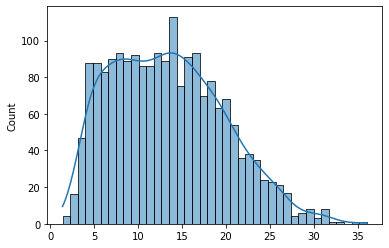

In [87]:
sns.histplot(y_pred_rf,bins=40,kde=True)

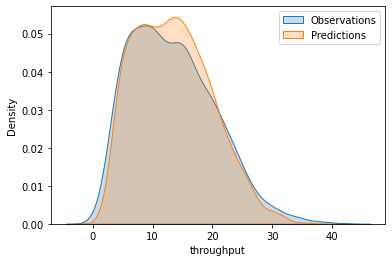

In [88]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_rf, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

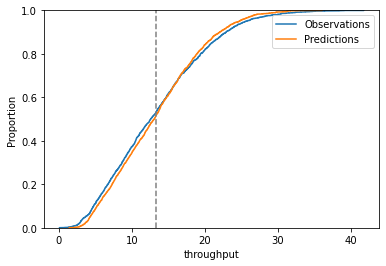

In [89]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_rf, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y,y_pred_rf)
mse = mean_squared_error(y,y_pred_rf)
rmse = np.sqrt(mse)

In [91]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,RF
MAE,1.116324
MSE,2.329715
RMSE,1.526341


In [92]:
err_df.to_csv(f'./model-err/{model_name}-{est}-err.csv')
# mean_scores.to_csv(f'./opt-model-err/{model_name}-err.csv')

In [93]:
from joblib import dump, load
dump(rf_model, f'./opt-models/{model_name}-{est}-model.joblib')

['./opt-models/RF-100-model.joblib']

DONE!